# Anwengungsbeispiel Regression: CooPick

## Über das Projekt CooPick

Der Prozess des Verpackens von Früchten umfasst die Prozessschritte: Portionierung, Qualitätskontrolle, Auflegen auf einen Träger, Verpackung und gegebenenfalls Nebenprozesse. Je nach Flexibilitäts- und Kapazitätsbedarf erfolgt das Auflegen von empfindlichen Früchten auf die Ladungsträger (Trays) meistens manuell.
Das Ziel dieses Projektes war es, die Entwicklung eines kollaborativen Fruchtauflegesystems, welches sowohl hinsichtlich des Mitarbeiter- als auch des Robotereinsatzes skalierbar ist und bei der automatisierten Aufnahme und Ablage der Früchte an definierten Koordinaten in definierter Orientierung sowie der Qualitätskontrolle unterstützen kann. Das entwickelte System wurde auf der Grundlage der Anforderungen und Qualitätsstandards für Äpfel entwickelt, kann aber an verschiedene andere Arten von Früchten angepasst werden. Die Früchte werden auf einem speziellen Förderband transportiert, das vom Hauptsystem gesteuert wird, so dass die Geschwindigkeit und Position des Bandes bekannt ist. Ein Kamerasystem erkennt die Position und Defekte der Früchte und sendet diese Informationen an ein Robotersystem mit zwei Roboterarmen, die mit speziell angepassten Greifern ausgerüstet sind. Die Roboter nehmen die freigegebenen Früchte auf, ohne deren Qualität zu beeinträchtigen und können dabei mit Mitarbeitern am Förderband zusammenarbeiten.


<img src="Photos/20200304_111109.jpg" style="width:200px">
<img src="Photos/20200304_112452.jpg" style="width:500px">


## Unser Ziel heute: Lageerkennung

Die Lageerkennung ist eine Herausforderung für die Deep-Learning Bildverarbeitung, denn um die Drehung eines Objektes im Raum erkennen zu können, benötigt man eine Datenbank mit allen möglichen Drehungen. Da es unendlich viele verschiedene Blickwinkel gibt, besteht der erste Schritt zur Erstellung der Datenbank darin, die Rotationen zu diskretisieren und die möglichen Redundanzen aufgrund der Symmetrie der Äpfel zu analysieren. Da das manuelle Drehen der Äpfel umständlich und ungenau ist, wurde eine Konstruktion mit Schrittmotor geschaffen, welche die Äpfel drehen und die benötigten Informationen entsprechend der Drehung erfassen kann. Sobald eine Umdrehung bezogen auf eine Achse vollendet ist, wird das Objekt erneut manuell eingespannt, damit nun um zweite Achse rotiert und der Prozess erneut gestartet werden kann.

## Wie kann einen Winkel vorhergesagt werden?

Ein Winkel ist ein kontinuierlicher Wert.

### Klassifikation:
    Es wäre möglich Winkeln in klassen zu verteilen. zB: 
    x=10, 20, 30 ...
    y=10, 20, 30 …
    und jede mögliche kombinationen von x und y. 
    
   <font color='orange'>Nachteile:</font>
   * Zu viele Klassen.
   * Nur diskrete werte wurden auch vorhergesagt

### Regression: 

Alle Werte können vorhergesagt werden. NN haben als output kontinuierlicher Werte, die durch eine softmax funktion in klassen verteilt werden. In diesem Fall wurde diese Schritt ausfallen. → INCLUIR MAS TEORIA


<img src="Photos/stepper.png" style="width:300px">

Es wurde eine Farbkamera, die von oben auf das Objekt fokussiert ist. Dies ermöglicht die Erzeugung künstlicher Rotationen, indem das Bild digital um den Mittelpunkt des Apfels gedreht wird.

<img src="Photos/xrot.png" style="width:500px">
<img src="Photos/zrot.png" style="width:500px">

## Was soll den Input und Output sein?
### Input: Bild mit einem Apfel

Die Bildern wurden semi-automatisch erzeugt. 
 - Schrittmotor + künztliche rotation

In [131]:
from fastai.vision.all import *

Daten: 
 - wie sind die Daten gespeichert?
 - wie sehen die Bildern aus?
 

In [132]:
#!pip install transforms3d
#path_apples=Path()/'Datensatz/Datensatz_1'
path_apples=Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung')
path_apples.ls().sorted()

(#35) [Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_01'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_01flipped'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_01new'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_01seg'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_02'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_02flipped'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_02new'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_02seg'),Path('/home/ara/Dokumente/CNN_Python/Pr

In [133]:
path_apples_4 = path_apples/'Apple_04'
apple_4_files = path_apples_4.ls(file_exts='.png').sorted()
apple_4_files

(#614) [Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_04/0000_X_000_Z_00.png'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_04/0001_X_010_Z_-80.png'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_04/0002_X_020_Z_-80.png'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_04/0003_X_030_Z_-80.png'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_04/0004_X_040_Z_-80.png'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_04/0005_X_050_Z_-80.png'),Path('/home/ara/Dokumente/CNN_Python/Projects/CooPick/coopick-2d/dataset/Apples_Reg_all/Apples_Vorlesung/Apple_04/0006_X_060_Z_-80.png'),Path('/home/ara/Dokumente/CNN_Pyth

In [134]:
apple_4_files[0].name

'0000_X_000_Z_00.png'

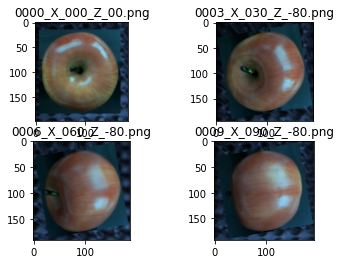

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline
# select some images to show
apple1 = apple_4_files[0]
apple2 = apple_4_files[3]
apple3 = apple_4_files[6]
apple4 = apple_4_files[9]

fig = plt.figure()
plt.subplot(2, 2, 1)
im = Image.open(apple1)
plt.imshow(im)
plt.title(apple1.name)

plt.subplot(2, 2, 2)
im = Image.open(apple2)
plt.imshow(im)
plt.title(apple2.name)

plt.subplot(2, 2, 3)
im = Image.open(apple3)
plt.imshow(im)
plt.title(apple3.name)

plt.subplot(2, 2, 4)
im = Image.open(apple4)
plt.imshow(im)
plt.title(apple4.name)

plt.show()

### Output: Winkel in x,z,y

Ein Apfel ist normalerweise in einem Axis symmetrisch, dann werden nur 2 Axis gebraucht.

Diese Information ist im Name des Bilds gespeichert: 

zum Beispiel: 0005_X_055_Z_05.png

- Bildnummer = 0005
- Winkel in X = 55°
- Winkel in Z = 5°

Mit 'Regular Expression operations' kann man diese Information herausfinden

In [136]:
file_name = apple2.name

xz_reg = re.compile(r'X_(-?\d+)_Z_(-?\d+).png$')
x=float(xz_reg.search(str(file_name)).group(1))
z=float(xz_reg.search(str(file_name)).group(2))

x,z

(30.0, -80.0)

Trotzdem haben Winkeln in Grad große Nachteile für das Trainieren von CNN. 
- Die Inputs der NN sind normalisiert, daher sind Werte nahe der Einheit vorzuziehen. Zum Beispiel, es sollten Radians anstelle von Graden verwendet werden. Noch besser ist es, Quaternionen zu verwenden, die Werte zwischen -1 und 1 enthalten.
- Gimbal Lock: In diesem Zustand liegen zwei der möglichen drei Drehachsen parallel zueinander und das System hat dadurch einen Freiheitsgrad weniger.
- 0° = 360°

Deswegen werden oft Quaternionen benutzt:

Die Funktion get_y liest die name von einem Bild und ergibt die dazugehörige Quaternionen. 

In [137]:
from transforms3d.euler import euler2quat, quat2euler, mat2euler, euler2mat 

def get_y(file_name):
    pat = r'X_(-?\d+)_Z_(-?\d+).png$'
    pat = re.compile(pat)
    x=float(pat.search(str(file_name)).group(1))*3.1415926/180
    z=float(pat.search(str(file_name)).group(2))*3.1415926/180
    mat=euler2mat(x,0,z, axes='sxyz')
    return np.reshape(mat,9)



In [138]:
get_y(file_name)

array([ 0.1736482 ,  0.85286853, -0.49240387, -0.98480775,  0.15038375,
       -0.0868241 , -0.        ,  0.49999999,  0.86602541])

An sich ist ein DataBlock in Fastai nur eine Vorlage, um die Daten zusammenzustellen. 

Normalerweise wird den DataBlock aufgebaut, indem die Folgende Fragen beantwortet werden:

- Datatyp von Inputs und Outputs? Hier Bilder und Nummern
- wo befinden sich die Daten? Hier in Dateinamen in Unterordnern
- muss etwas auf die Inputs angewendet werden? Hier nein
- muss etwas auf die Outputs angewandt werden? Hier die Funktion get_y
- wie werden die Daten aufgeteilt? Hier zufällig
- müssen wir etwas auf geformte Elemente anwenden? Hier eine Größenänderung (Resize)
- müssen wir etwas auf batch_transformations anwenden? Hier keine

Damit kann ein dataloader erstellt werden. Dies erhalt die Training und Validation Datenseztse, um die CNN zu trainieren!

In [139]:
path = path_apples
dblock = DataBlock(blocks=(ImageBlock, RegressionBlock),
                   splitter  = RandomSplitter(valid_pct=0.2,seed=7),
                   get_items = get_image_files,
                   get_y = get_y,
                   item_tfms = Resize(90),
                  )

dls = dblock.dataloaders(path)


In [140]:
dls.train_ds[0:5]

[(PILImage mode=RGB size=190x190,
  tensor([ 0.1736,  0.6330, -0.7544,  0.9848, -0.1116,  0.1330, -0.0000, -0.7660,
          -0.6428])),
 (PILImage mode=RGB size=190x190,
  tensor([ 0.7660, -0.3214,  0.5567,  0.6428,  0.3830, -0.6634, -0.0000,  0.8660,
           0.5000])),
 (PILImage mode=RGB size=190x190,
  tensor([ 0.3420, -0.3214, -0.8830,  0.9397,  0.1170,  0.3214, -0.0000, -0.9397,
           0.3420])),
 (PILImage mode=RGB size=190x190,
  tensor([ 0.9063,  0.4210,  0.0368, -0.4226,  0.9029,  0.0790, -0.0000, -0.0872,
           0.9962])),
 (PILImage mode=RGB size=190x190,
  tensor([ 0.9397,  0.2620,  0.2198, -0.3420,  0.7198,  0.6040, -0.0000, -0.6428,
           0.7660]))]

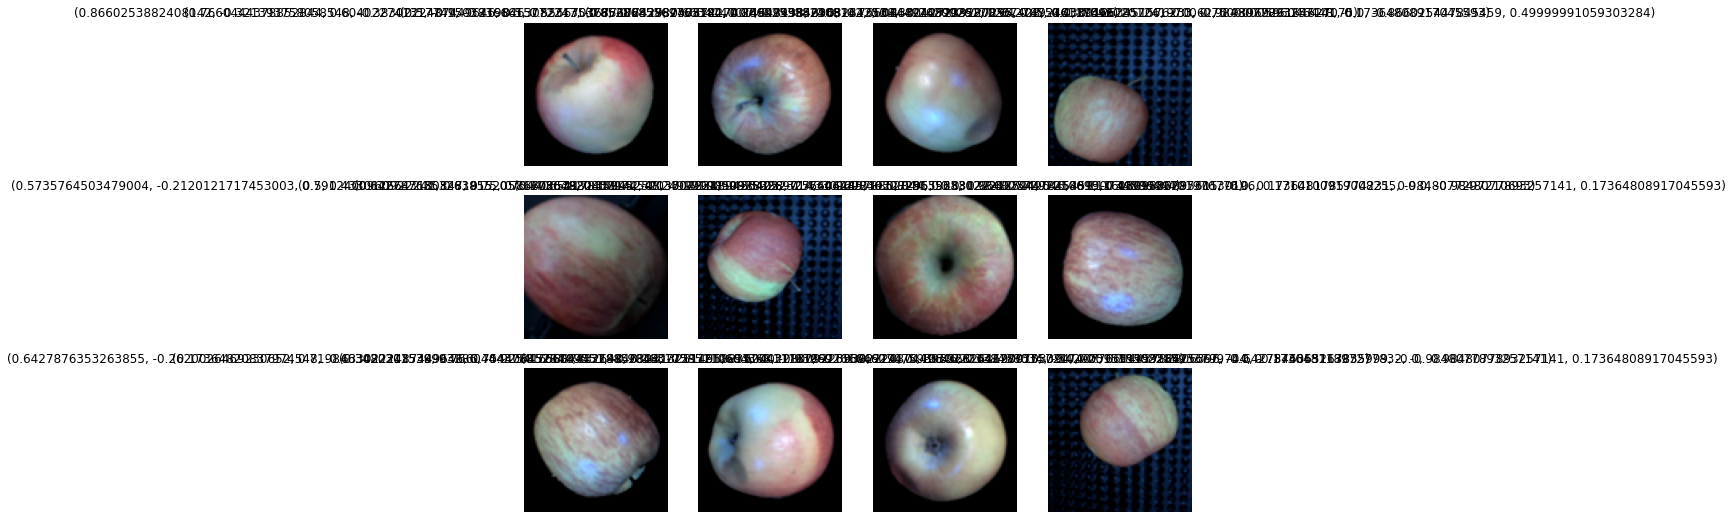

In [141]:
dls.show_batch(max_n=12)

In [142]:
learn = cnn_learner(dls,resnet34,pretrained=True,metrics=(mae,mse))

Input von cnn_learner:

- dls: Wir benutzen die Daten auf dem Dataloader
- Transfer learning: Wir benutzen eine vortranierte CNN (resnet34,pretrained=True)
- Metrics: Wir werden beobachten ob den mae (mean absolute error) und mse (mean squared error) besser werden. 

In [143]:
#Andere parametern sind als dafault konfiguriert
learn.opt_func

<function fastai.optimizer.Adam(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.01, decouple_wd=True)>

In [144]:
learn.loss_func

FlattenedLoss of MSELoss()

## Jetzt können wir tranieren, aber:
- welche Learning Rate soll man hier benutzen?

        Standard Vorgehen: einfach testen mit 0.1, 0.01, 0.001

- wie viele epoche?

        auch testen, wie lange braucht mein Netzt zum Lernen? 
        overfitting?
        z.B. 10 epochen


epoch,train_loss,valid_loss,mae,mse,time
0,0.339268,0.249546,0.393932,0.249546,00:12
1,0.224644,0.351391,0.458184,0.351391,00:12
2,0.338065,4.206771,0.715063,4.206771,00:12
3,0.277137,772.340637,1.684510,772.340637,00:12
4,0.479327,1.622301,0.544318,1.622301,00:12
5,0.275327,131.052856,0.623124,131.052856,00:12
6,0.293258,77.855766,0.507550,77.855766,00:12
7,0.236409,9.708033,0.406221,9.708033,00:12


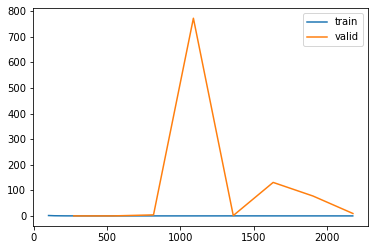

In [145]:
lr=0.1
learn = cnn_learner(dls,resnet34,pretrained=True,metrics=(mae,mse))
learn.fit(8,lr)
learn.recorder.plot_loss(skip_start=100)

Diese LR ist zu groß!

    - Nach 5 epochen wurde die train_loss nicht besser, sogar schlechter
    - Das valid_loss wurde instabil
    - nach 5 epochen wird das Loss nur schlechter

epoch,train_loss,valid_loss,mae,mse,time
0,0.199466,0.132678,0.264769,0.132678,00:12
1,0.088663,0.060234,0.169921,0.060234,00:12
2,0.064661,0.071036,0.183074,0.071036,00:12
3,0.056486,0.047074,0.146502,0.047074,00:12
4,0.050122,0.037468,0.129552,0.037468,00:12
5,0.045084,0.031752,0.118772,0.031752,00:12
6,0.040741,0.032770,0.124303,0.032770,00:12
7,0.042439,0.063756,0.168587,0.063756,00:12
8,0.042621,0.035416,0.128783,0.035416,00:12
9,0.041851,0.039558,0.140539,0.039558,00:12


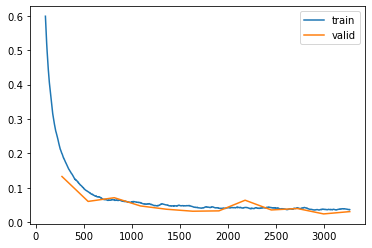

In [146]:
lr=0.01
learn = cnn_learner(dls,resnet34,pretrained=True,metrics=(mae,mse))
learn.fit(12,lr)
learn.recorder.plot_loss(skip_start=100)

Diese LR scheint O.K., vielleicht noch zu groß:
    - Das train_loss wird immer besser
    - Das valid_loss swankt nach 5 epochen. Aber einen Wert von 0.0X wurde schnell erreicht


epoch,train_loss,valid_loss,mae,mse,time
0,0.512350,0.181680,0.330875,0.181680,00:12
1,0.183751,0.122857,0.255983,0.122857,00:12
2,0.118361,0.074763,0.192229,0.074763,00:12
3,0.083216,0.051968,0.157729,0.051968,00:12
4,0.066902,0.040112,0.138882,0.040112,00:12
5,0.055461,0.031543,0.123545,0.031543,00:12
6,0.047926,0.031562,0.123838,0.031562,00:12
7,0.042955,0.025644,0.111723,0.025644,00:12
8,0.042331,0.023603,0.104582,0.023603,00:12
9,0.037241,0.020200,0.097533,0.020200,00:12


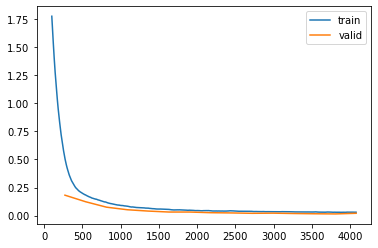

In [147]:
lr=0.001
learn = cnn_learner(dls,resnet34,pretrained=True,metrics=(mae,mse))
learn.fit(15,lr)
learn.recorder.plot_loss(skip_start=100)

Diese LR scheint O.K., vielleicht noch zu groß:

    - Das train_loss wird immer besser
    - Das valid_loss wird immer besser
    - Aber es braucht zu lange, zu tranieren! Das könnte auch zu overfitting führen

##  Eine bessere Option: Learning Rate Finder (Fastai)

Es werden kleine batches benutzt, und mit verschiedenen LRs traniert. Das plotten von den Losses soll die LR-Entscheidung einfacher machen:

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.03981071710586548)

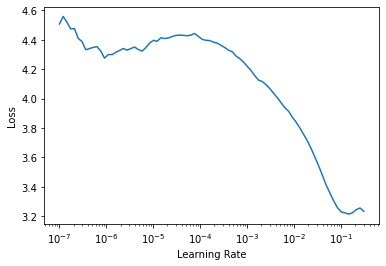

In [148]:
learn = cnn_learner(dls,resnet34,pretrained=True,metrics=(mae,mse))
learn.lr_find()

Ein wert zwischen 0.01 und 0.039 wurde als maximale LR vorgeschlagen. Wir waren nicht falsch!

Fastai, biettet auch "cyclic learning rates". Das beutet, dass das LR sich mit der Zeit ändert. 

epoch,train_loss,valid_loss,mae,mse,time
0,0.295100,0.181164,0.318324,0.181164,00:12
1,0.093358,0.069674,0.185945,0.069674,00:12
2,0.087251,0.172289,0.289981,0.172289,00:13
3,0.076318,0.080699,0.196296,0.080699,00:13
4,0.063753,0.058241,0.166976,0.058241,00:13
5,0.047942,0.045902,0.148331,0.045902,00:13
6,0.037503,0.028398,0.118497,0.028398,00:13
7,0.030147,0.015148,0.083439,0.015148,00:13
8,0.023429,0.010224,0.067581,0.010224,00:13
9,0.021111,0.009653,0.065275,0.009653,00:13


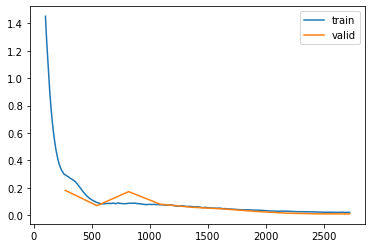

In [149]:
lr=3e-2
learn = cnn_learner(dls,resnet34,pretrained=True,metrics=(mae,mse))
learn.fit_one_cycle(10,lr)
learn.recorder.plot_loss(skip_start=100)

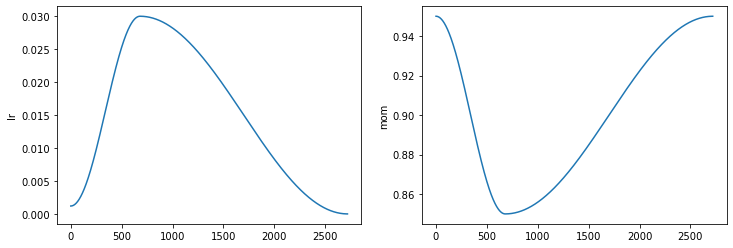

In [150]:
learn.recorder.plot_sched()

SuggestedLRs(lr_min=1.58489319801447e-07, lr_steep=4.786300905834651e-06)

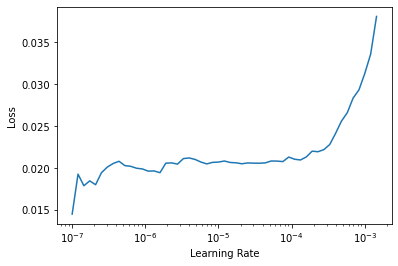

In [151]:
learn.unfreeze()
learn.lr_find()

### Fine-Tunning

mit der .fit und .fit_one_cycle waren fast alle die gewichte von unsere CNN gefroren, bzw. konnten nicht aktualisiert werden. Nur die Parametern in dem letzten Layer wurden angepasst.

Mit fine-tuning können auch die letze Layers traniert werden. 

In [152]:
learn.fit_one_cycle(3,lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,mae,mse,time
0,0.021342,0.008543,0.060404,0.008543,00:16
1,0.018666,0.007472,0.056530,0.007472,00:16
2,0.018516,0.007199,0.055882,0.007199,00:16


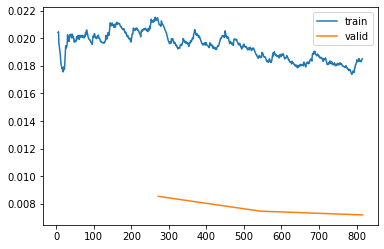

In [153]:
learn.recorder.plot_loss()

Sehr gut, mein Netz hat etwas gelernt! 
- Aber ist das gut? 
- Wie kann ich es beurteilen?
- Wie kann ich es testen?


wir können erstmal mit einem Bild aus den Datensatz testen, ob die Vorhersage gut ist:

(50.00004091511464, -30.000025785229777)

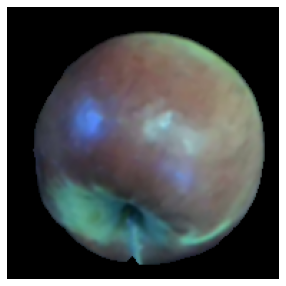

In [154]:
# Image from the validation dataset:
valid_image = dls.valid_ds[0][0]
valid_image.show()
#print(dls.valid_ds[0][1])
quaternion_mat = dls.valid_ds[0][1].reshape([3,3])
quaternion_mat
euler=mat2euler(quaternion_mat,axes='sxyz')
X,Z = euler[0]*180/3.14159, euler[2]*180/3.14159
X,Z

In [155]:
# Predict the quaternion matrix and show the euler angles
pred = learn.predict(dls.valid_ds[0][0])
quaternion_mat = pred[1].reshape([3,3])
quaternion_mat
euler=mat2euler(quaternion_mat,axes='sxyz')
Xp,Zp = euler[0]*180/3.14159, euler[2]*180/3.14159
Xp,Zp

(50.521277162635904, -22.009034873751265)

In [156]:
# mean absoule error
Xerror = np.abs(Xp-X)
Zerror = np.abs(Zp-Z)
Xerror, Zerror

(0.5212362475212657, 7.990990911478512)

Das ist ganz gut, aber das ist nur einen Bild. Das sollten wir für jedes Bild im Datensatz durchführen

In [157]:
import torch
def my_interpreter(learner):
    preds = learner.get_preds()
    pred_nr = preds[0].shape[0]
    pred_mat = torch.clamp(preds[0].reshape([pred_nr,3,3]),-1,1)
    real_mat = preds[1].reshape([pred_nr,3,3])
    pred_angle = []
    real_angle = []
    # convert pred_mat to euler
    for pm in pred_mat:
        euler=mat2euler(pm,axes='sxyz')
        pred_angle.append([euler[0]*180/3.14159, euler[2]*180/3.14159])
    # convert real_mat to euler
    for pm in real_mat:
        euler=mat2euler(pm,axes='sxyz')
        real_angle.append([euler[0]*180/3.14159, euler[2]*180/3.14159])
    # find mae and show it    
    y_diff_d = np.array(pred_angle)-np.array(real_angle)
    y_real_d=np.array(real_angle)
    y_pred_d=np.array(pred_angle)
    mae_d=np.mean(np.abs(y_diff_d))
    maex_d=np.mean(np.abs(y_diff_d[:,0]))
    maez_d=np.mean(np.abs(y_diff_d[:,1]))
    # plot real value vs predicted value
    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.figure(figsize=(12,12)) 
    plt.subplot(221)
    plt.scatter(y_real_d[:,0], y_pred_d[:,0])
    plt.title('X Rotation')
    plt.xlabel('Real angle')
    plt.ylabel('Prediction for angle in degrees')
    plt.grid()
    #plt.show()
    plt.subplot(222)
    plt.scatter(y_real_d[:,1], y_pred_d[:,1])
    plt.title('Z Rotation')
    plt.xlabel('Real angle')
    plt.ylabel('Prediction for angle in degrees')
    #plt.show()
    # plot the histograms to check the error distribution (using 36 bins)
    plt.subplot(223)
    plt.title('Error histogram aroud X')
    plt.xlabel('Error value in degrees')
    plt.ylabel('Nr of errors')
    plt.hist(y_diff_d[:,0],36)
    plt.subplot(224)
    plt.title('Error histogram aroud Z')
    plt.xlabel('Error value in degrees')
    plt.ylabel('Nr of errors')
    plt.hist(y_diff_d[:,1],36)
    print('X-MAE in Degrees =',maex_d,'\t \t Z-MAE in Degrees =',maez_d)
    print('\n \t Average MAE in Degrees =',mae_d)
    print('info: this returns [y_pred_d,y_real_d,y_diff_d] in case you need it')
    return [y_pred_d,y_real_d,y_diff_d]

X-MAE in Degrees = 7.295852583731236 	 	 Z-MAE in Degrees = 4.962307656142116

 	 Average MAE in Degrees = 6.129080119936676
info: this returns [y_pred_d,y_real_d,y_diff_d] in case you need it


<Figure size 432x288 with 0 Axes>

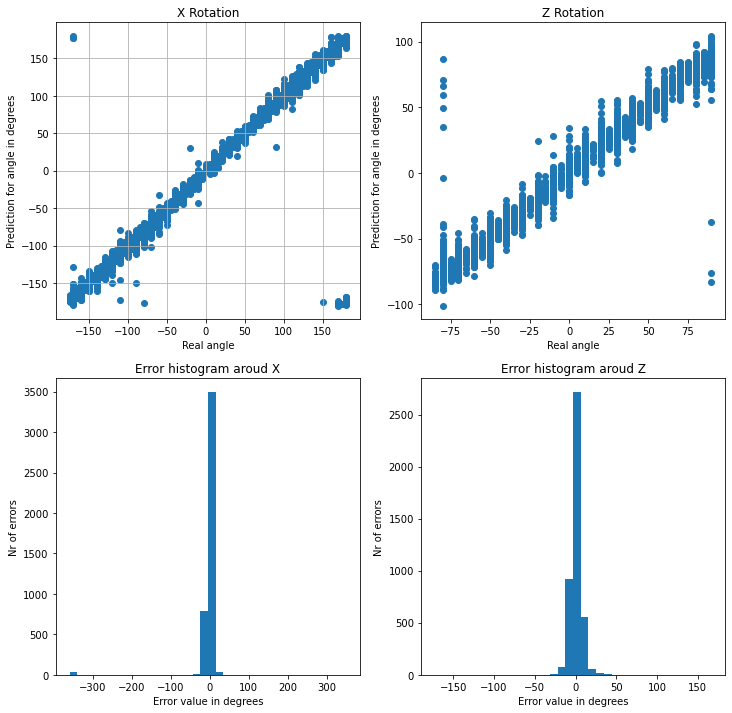

In [158]:
my_interpreter(learn);

## Super! Es klappt richtig gut!

jetzt soll man auch mit echten Bildern testen

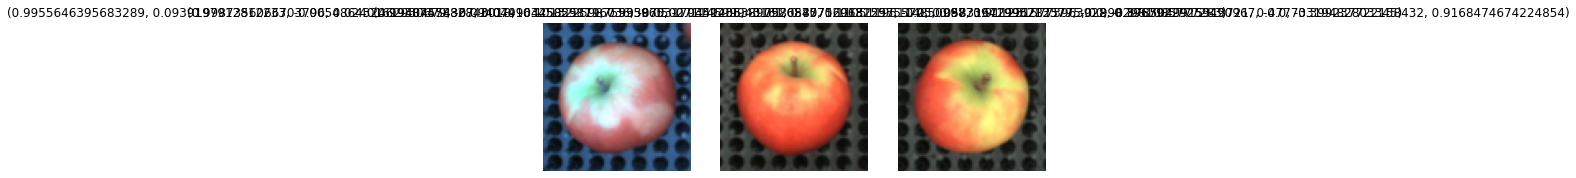

In [159]:
def get_mat(file_name):
    pat = r'X_(-?\d+\.\d*)_Z_(-?\d+\.\d*).jpg$'
    pat = re.compile(pat)
    x=float(pat.search(str(file_name)).group(1))*3.1415926/180
    z=float(pat.search(str(file_name)).group(2))*3.1415926/180
    mat=euler2mat(x,0,z, axes='sxyz')
    return np.reshape(mat,9)

test_dblock = DataBlock(blocks=(ImageBlock, RegressionBlock),
                   splitter  = RandomSplitter(valid_pct=0.9,seed=7),
                   get_items = get_image_files,
                   get_y = get_mat,
                   item_tfms = Resize(90), #RandomResizedCrop(90, min_scale=0.8,ratio=(0.8,1.2)),
                   #batch_tfms=[*aug_transforms(size=90,flip_vert=True,max_rotate=90)]
                  )



test_path = Path()/'../../Testset'
test_dls = test_dblock.dataloaders(test_path,bs=3)
test_dls.show_batch()

In [160]:
learn.dls = test_dls

X-MAE in Degrees = 149.25553686317159 	 	 Z-MAE in Degrees = 55.337933057683586

 	 Average MAE in Degrees = 102.29673496042761
info: this returns [y_pred_d,y_real_d,y_diff_d] in case you need it


<Figure size 432x288 with 0 Axes>

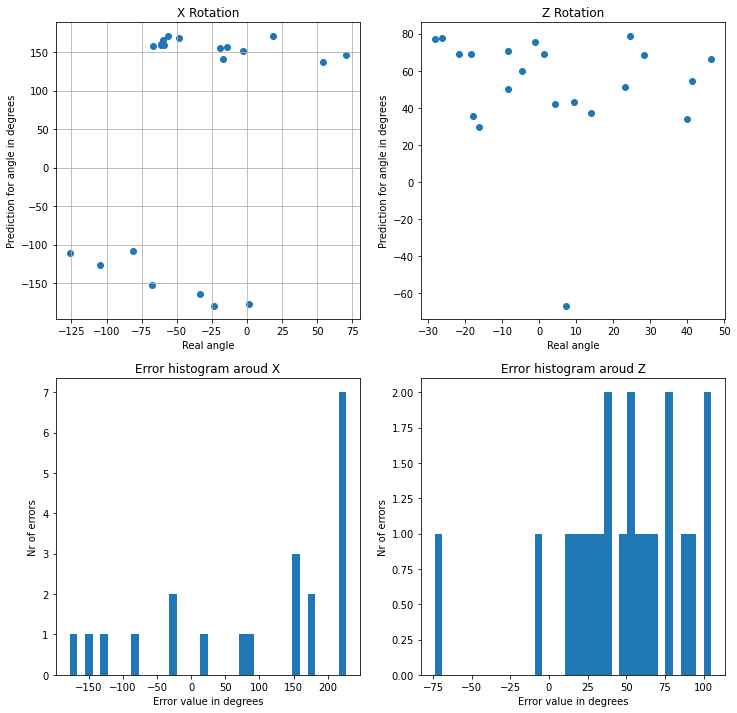

In [161]:
my_interpreter(learn);

## Wir haben ein Problem! Mit echten Daten geht es gar nicht! Warum?!

## Warum klappt es nicht?

### 1. Poblem: Die Bilder im Validierungs- und Trainings-Set sind praktisch gleich.
Da die Bildern zufällig ausgewählt sind und nur wenige Winkel gedreht sind, sind Äpfel im Validierungs- und Trainings-Set praktisch gleich. Aus diesem Grund scheint es, als ob das Netzwerk perfekt funktioniert, aber in Wirklichkeit hat das Netz genau den Winkel diesen 20 Äpfel zu unterscheiden und nicht andere Äpfel.

### 1. Lösung: Unterschiedliche Äpfel für den Trainings- und Validierungssatz.

z. B. die ersten 15 Äpfel zum Trainieren und die letzten 5 Äpfel zum Validieren verwenden.

### 2. Problem: In den Trainingsbildern sind die Bildränder zu erkennen.

Sobald sie gedreht werden, sind die ränder zu sehen (Apfel 4). Dies kann vom neuronalen Netzwerk verwendet werden, um eine Drehung zu erkennen, aber in einem realen Beispiel wird dies nicht geben. 
### Lösung: Solche Äpfel nur für die Validierung benutzen.






jetzt haben wir verschiedene Äpfel für das Training und Validierung, damit die CNN besser verallgemeinen können. 

In [162]:
path_apples.ls()
train=[Path(x).name for x in path_apples.ls() if Path(x).name[7]!='4']
val=[Path(x).name for x in path_apples.ls() if Path(x).name[7]=='4']
train,val

(['Apple_02',
  'Apple_05new',
  'Apple_18seg',
  'Apple_01new',
  'Apple_02new',
  'Apple_07seg',
  'Apple_10seg',
  'Apple_08seg',
  'Apple_13seg',
  'Apple_02flipped',
  'Apple_15seg',
  'Apple_03new',
  'Apple_01flipped',
  'Apple_16seg',
  'Apple_02seg',
  'Apple_06seg',
  'Apple_19seg',
  'Apple_09seg',
  'Apple_20seg',
  'Apple_03seg',
  'Apple_03flipped',
  'Apple_05',
  'Apple_03',
  'Apple_01',
  'Apple_17seg',
  'Apple_05seg',
  'Apple_11seg',
  'Apple_12seg',
  'Apple_01seg',
  'Apple_05flipped'],
 ['Apple_04flipped', 'Apple_04', 'Apple_14seg', 'Apple_04new', 'Apple_04seg'])

In [163]:
dblock2 = DataBlock(blocks=(ImageBlock, RegressionBlock),
                   splitter  = FuncSplitter(lambda o: Path(o).parent.name[7]=='4'),
                   get_items = get_image_files,
                   get_y = get_y,
                   item_tfms = RandomResizedCrop(90, min_scale=0.9,ratio=(0.8,1.2)),
                   #batch_tfms=[*aug_transforms(size=90,flip_vert=True,max_rotate=90)]
                  )

dls2 = dblock2.dataloaders(path_apples)

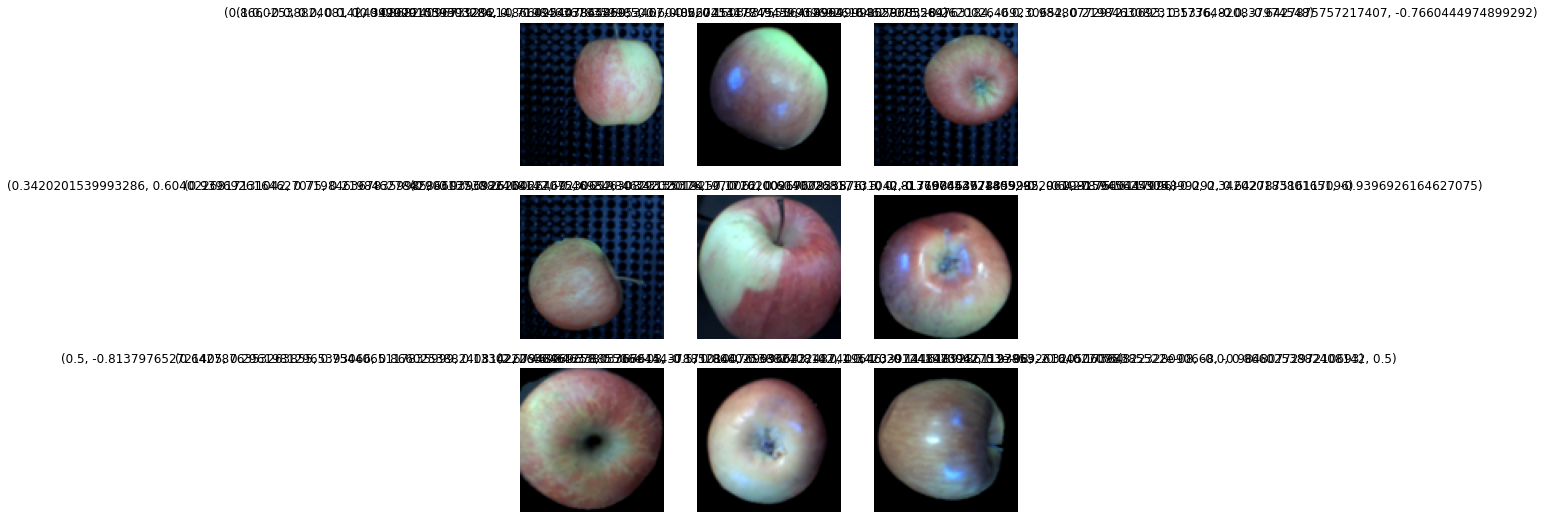

In [164]:
dls2.show_batch()

Einige Äpfel haber kein Hintergrund und andere haben ein künstliche Hintergrund, aber die Ecken sind nicht zu sehen!

In [165]:
learn2 = cnn_learner(dls2,resnet50,pretrained=True,metrics=(mae,mse))

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=7.585775847473997e-07)

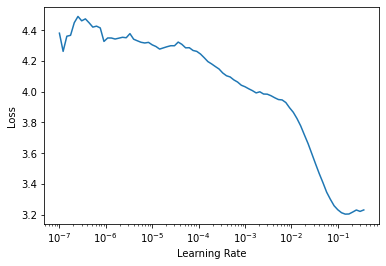

In [166]:
learn2.lr_find()

epoch,train_loss,valid_loss,mae,mse,time
0,0.252521,0.318588,0.406035,0.318588,00:20
1,0.055286,0.218736,0.300440,0.218736,00:20
2,0.048590,0.205107,0.276709,0.205107,00:20
3,0.035265,0.198954,0.271413,0.198954,00:20
4,0.022443,0.168327,0.238041,0.168327,00:20
5,0.017507,0.169579,0.237294,0.169579,00:20


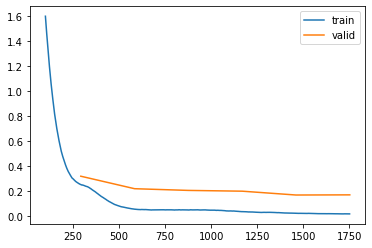

In [167]:
lr = 2e-2
learn2.fit_one_cycle(6,lr)
learn2.recorder.plot_loss(skip_start=100)

unsere Netze können nicht mehr so einfach lernen! 
Das ist aber gut, die Bilder können nicht mehr auswendig gelernt werden!

### Nochmals Fine-Tunning



In [168]:
learn2.unfreeze()

SuggestedLRs(lr_min=1.737800812406931e-06, lr_steep=1.5848931980144698e-06)

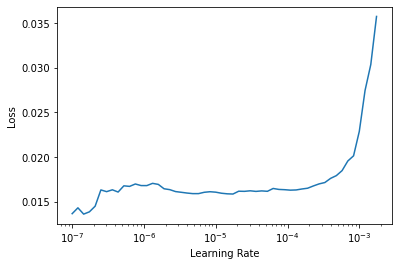

In [169]:
learn2.lr_find()

In [170]:
 learn2.fit_one_cycle(4,lr_max=slice(5e-6,5e-4))

epoch,train_loss,valid_loss,mae,mse,time
0,0.017530,0.187757,0.245363,0.187757,00:26
1,0.017380,0.160049,0.222247,0.160049,00:26
2,0.014364,0.165310,0.224217,0.165310,00:26
3,0.013026,0.158973,0.220832,0.158973,00:26


## Go Big
eine besere Auflösung enthält mehr Information, so können die Netze ein bisschen besser werden. Das Training dauert aber länger!

In [171]:
dblock2_big= DataBlock(blocks=(ImageBlock, RegressionBlock),
                   splitter  =FuncSplitter(lambda o: Path(o).parent.name[7]=='4'),
                   get_items = get_image_files,
                   get_y = get_y,
                   item_tfms = RandomResizedCrop(224, min_scale=0.9,ratio=(0.8,1.2)),
                   batch_tfms=[*aug_transforms(size=224,do_flip=False,flip_vert=False,max_rotate=0)]
                  )

dls2_big = dblock2_big.dataloaders(path_apples)

In [172]:
learn2.dls = dls2_big

In [173]:
learn2.freeze()

SuggestedLRs(lr_min=0.0015848932787775993, lr_steep=0.0030199517495930195)

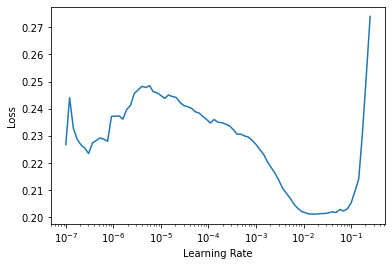

In [174]:
learn2.lr_find()

epoch,train_loss,valid_loss,mae,mse,time
0,0.048003,0.188405,0.250928,0.188405,01:23
1,0.029413,0.179813,0.243972,0.179813,01:22
2,0.021252,0.155509,0.226427,0.155509,01:23
3,0.019214,0.155796,0.221626,0.155796,01:23
4,0.018664,0.159820,0.221157,0.159820,01:23


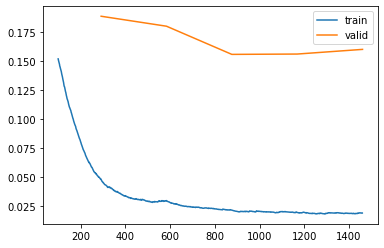

In [175]:
max_lr = 2e-3
# fine_tune macht das Fine-Tunning für uns!
learn2.fit_one_cycle(5,max_lr)
learn2.recorder.plot_loss(skip_start=100)

### Wieder Fine-Tunning



In [176]:
learn2.unfreeze()

SuggestedLRs(lr_min=3.6307807022240014e-06, lr_steep=3.981071586167673e-06)

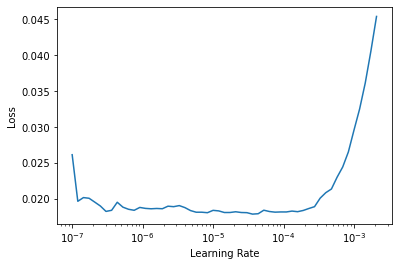

In [177]:
learn2.lr_find()

In [178]:
 learn2.fit_one_cycle(7,lr_max=slice(3e-6,3e-4))

epoch,train_loss,valid_loss,mae,mse,time
0,0.017952,0.151265,0.220923,0.151265,01:47
1,0.017799,0.155378,0.215044,0.155378,01:47
2,0.016022,0.154718,0.211471,0.154718,01:47
3,0.014969,0.141276,0.204280,0.141276,01:47
4,0.014130,0.131706,0.194121,0.131706,01:47
5,0.013266,0.138728,0.201260,0.138728,01:47
6,0.013407,0.141750,0.200459,0.141750,01:47


X-MAE in Degrees = 53.110010603052935 	 	 Z-MAE in Degrees = 12.50033904997247

 	 Average MAE in Degrees = 32.8051748265127
info: this returns [y_pred_d,y_real_d,y_diff_d] in case you need it


<Figure size 432x288 with 0 Axes>

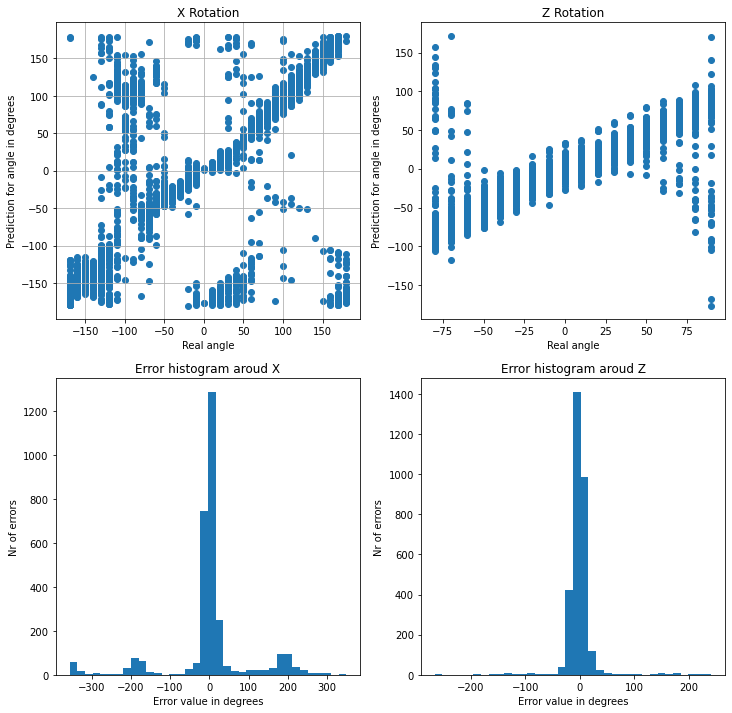

In [179]:
my_interpreter(learn2);

In [180]:
### Jetzt testen wir nochmal

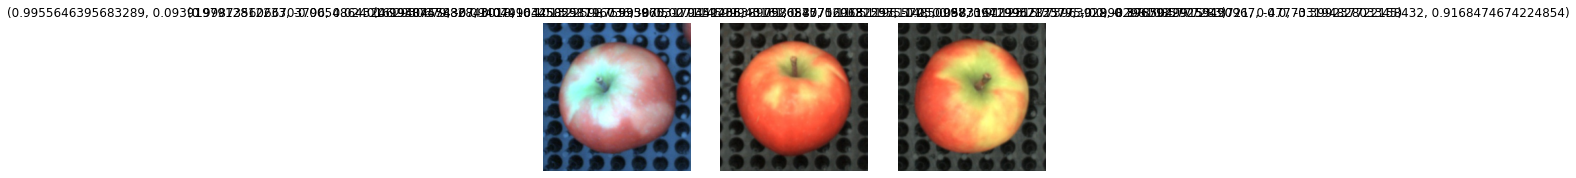

In [181]:
test_dblock = DataBlock(blocks=(ImageBlock, RegressionBlock),
                   splitter  = RandomSplitter(valid_pct=0.9,seed=7),
                   get_items = get_image_files,
                   get_y = get_mat,
                   item_tfms = Resize(224), 
                  )



test_path = Path()/'../../Testset'
test_dls = test_dblock.dataloaders(test_path,bs=3)
test_dls.show_batch()

learn2.dls = test_dls

X-MAE in Degrees = 34.947175082510796 	 	 Z-MAE in Degrees = 27.25250895936133

 	 Average MAE in Degrees = 31.099842020936062
info: this returns [y_pred_d,y_real_d,y_diff_d] in case you need it


<Figure size 432x288 with 0 Axes>

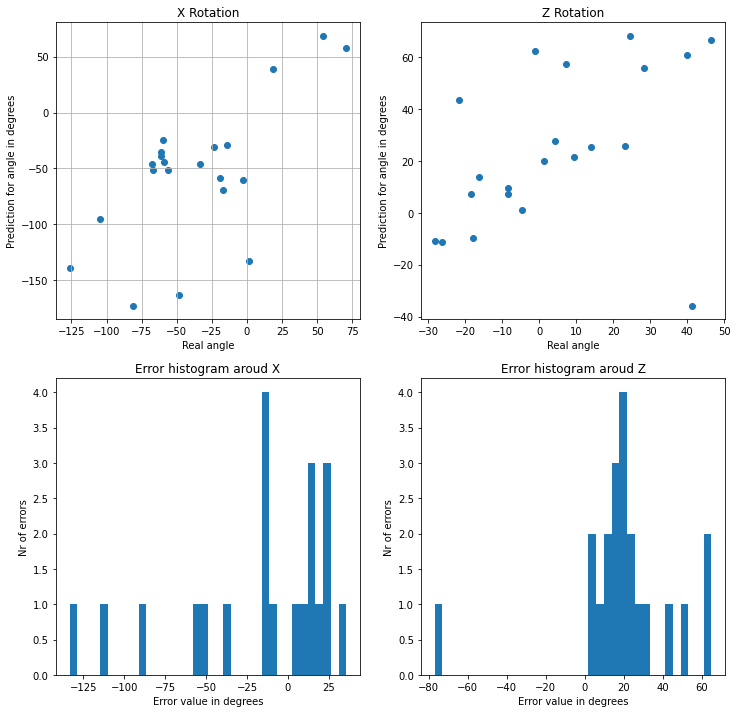

In [182]:
my_interpreter(learn2);

Das ist besser als raten, aber der Fehler ist noch zu groß!


## Warum klappt es noch nicht?

### Problem: Echte Daten unterscheiden sich von Trainings-Daten.
Beleuchtung und Hintergrund sind nicht ähnlich
### Lösung: Daten so ähnlich wie möglich zu echten Daten generieren. 


### Problem: Es gibt keine echte Daten in Datensatz
### Lösung: Echte Daten hinzufugen. 
Aber wie kann ich eine Rotation als mensch im Bild erkennen? 
- Vergleichsbild und Ergebnisse von der voraussage benutzen. Bilder die OK sind können zum Datensatz hinzugefügt werden. 

### Problem: Die Erkennung ist nicht robust
### Lösung: Data-Augmentation

# Versuch Nummer 3:

*Alles nochmals trainieren, aber mit den Lösungen für die Probleme in Versuch 1 und 2
.
.
.

*Testen mit echte Daten (OK, es funktiert, nicht perfekt, aber ist doch nicht so schlimm!)

## Weitere mögliche Verbesserungen:
- Mehr Daten: echte Daten Verwenden aus unterschiedliche Äpfelsorten.
- Weitere state-of-the-art Netze testen
- Neue Optimizers, nicht liniare Funktionen (Mish anstatt Relu), und weitere coole sachen!

## + Lernen erklären (Backpropagation, Gradient Descent)
